# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [3]:

pip install pandas numpy matplotlib seaborn nbformat nbconvert

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: c:\Users\nitig\.pyenv\pyenv-win\versions\3.11.9\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Print available plot styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [6]:
# Load the dataset
df = pd.read_csv('./data/Climate_Change_Indicators.csv')
# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [7]:
import os
print(os.getcwd()) 
# Load the dataset
# df = pd.read_csv('./data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

c:\Users\nitig\OneDrive\Desktop\assignment\eda-climate\complete-eda-assignment-coding-ninja


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [8]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [9]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
if 'Year' not in df.columns:
    raise ValueError("The 'Year' column is missing from the dataset.")

# Inspect the first few rows to understand the structure
print(df.head())

# Aggregating data by year (assuming climate variables are already present in the dataset)
df_yearly = df.groupby('Year').mean()

# Display the aggregated data
print(df_yearly)

# Ensure that the time range covers 124 years (1900-2023)
if df_yearly.index.min() != 1900 or df_yearly.index.max() != 2023:
    raise ValueError("The data does not span the expected years (1900-2023).")

# Optionally, save the aggregated data to a new CSV file
df_yearly.to_csv('climate_aggregated_by_year.csv')

# Display the aggregated data
print(df_yearly)

   Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
0  1948                            13.17                   397.04   
1  1996                            13.10                   313.17   
2  2015                            14.67                   311.95   
3  1966                            14.79                   304.25   
4  1992                            13.15                   354.52   

   Sea Level Rise (mm)  Arctic Ice Area (million km²)  
0               116.25                           5.97  
1               277.92                           9.66  
2               290.32                           8.40  
3               189.71                          11.83  
4                14.84                          11.23  
      Global Average Temperature (°C)  CO2 Concentration (ppm)  \
Year                                                             
1900                        14.506663               350.373405   
1901                        14.485343              

## 2. Univariate Analysis

Analyze each climate variable independently.

Descriptive statistics for Global Average Temperature (°C):
count    1.048576e+06
mean     1.449954e+01
std      8.661005e-01
min      1.300000e+01
25%      1.375000e+01
50%      1.450000e+01
75%      1.525000e+01
max      1.600000e+01
Name: Global Average Temperature (°C), dtype: float64
Descriptive statistics for CO2 Concentration (ppm):
count    1.048576e+06
mean     3.500280e+02
std      4.042409e+01
min      2.800000e+02
25%      3.149900e+02
50%      3.500700e+02
75%      3.850200e+02
max      4.200000e+02
Name: CO2 Concentration (ppm), dtype: float64
Descriptive statistics for Sea Level Rise (mm):
count    1.048576e+06
mean     1.499900e+02
std      8.657659e+01
min      0.000000e+00
25%      7.497000e+01
50%      1.500200e+02
75%      2.249300e+02
max      3.000000e+02
Name: Sea Level Rise (mm), dtype: float64
Descriptive statistics for Arctic Ice Area (million km²):
count    1.048576e+06
mean     9.000896e+00
std      3.462551e+00
min      3.000000e+00
25%      6.000000e+00
50

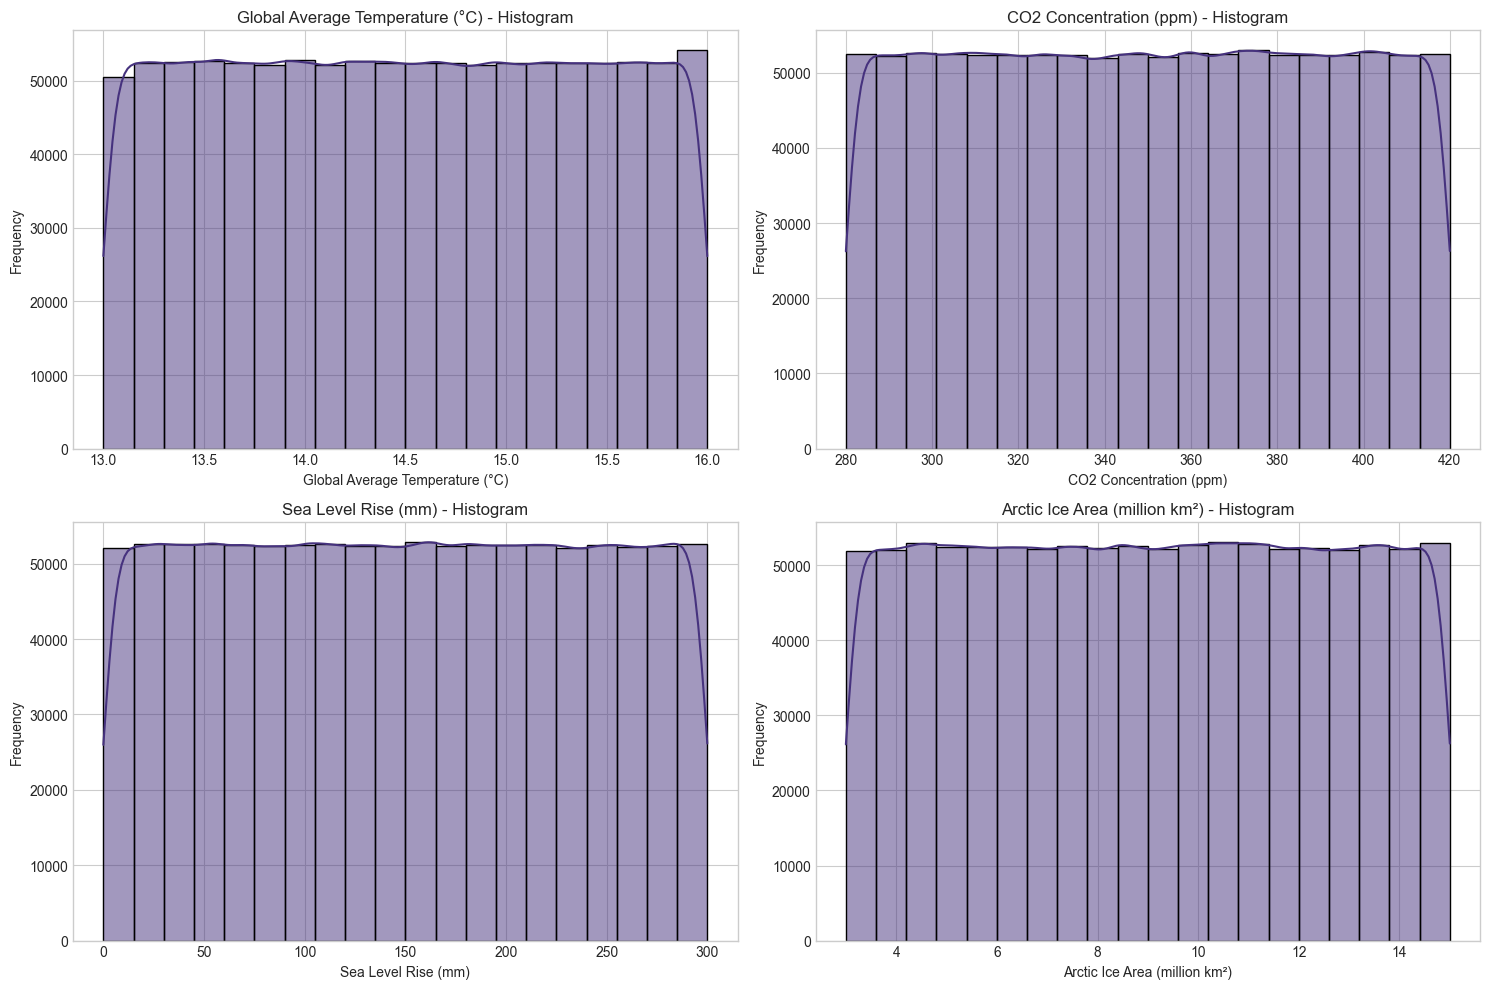

In [10]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here
# Create a figure with subplots for visualizations
climate_vars = ['Global Average Temperature (°C)', 'CO2 Concentration (ppm)', 'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array to easily iterate

# Loop over climate variables to perform univariate analysis
for i, var in enumerate(climate_vars):
    # Descriptive statistics
    print(f"Descriptive statistics for {var}:")
    print(df[var].describe())  # Print the summary statistics

    # Create histograms
    sns.histplot(df[var], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'{var} - Histogram')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Display the visualizations
plt.tight_layout()
plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

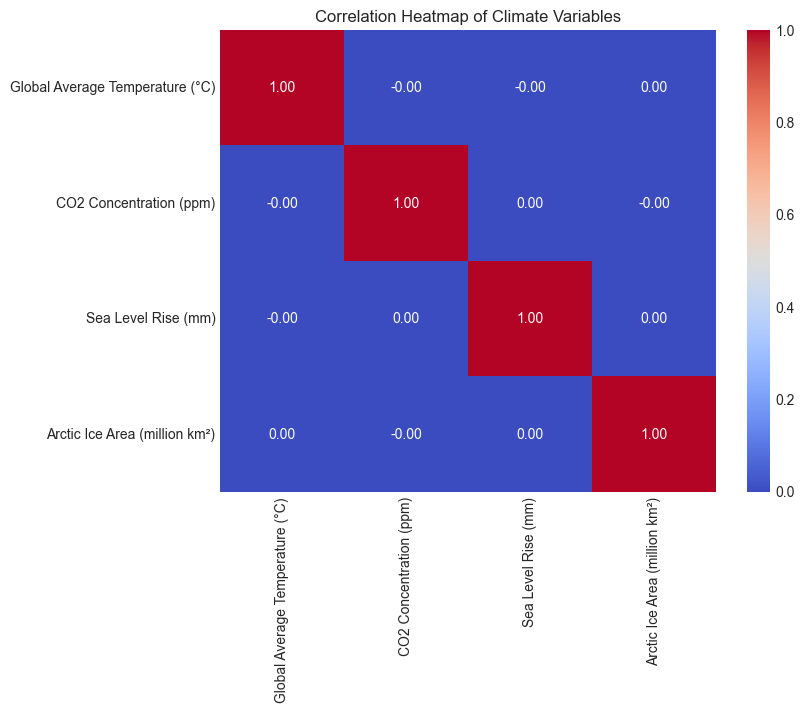

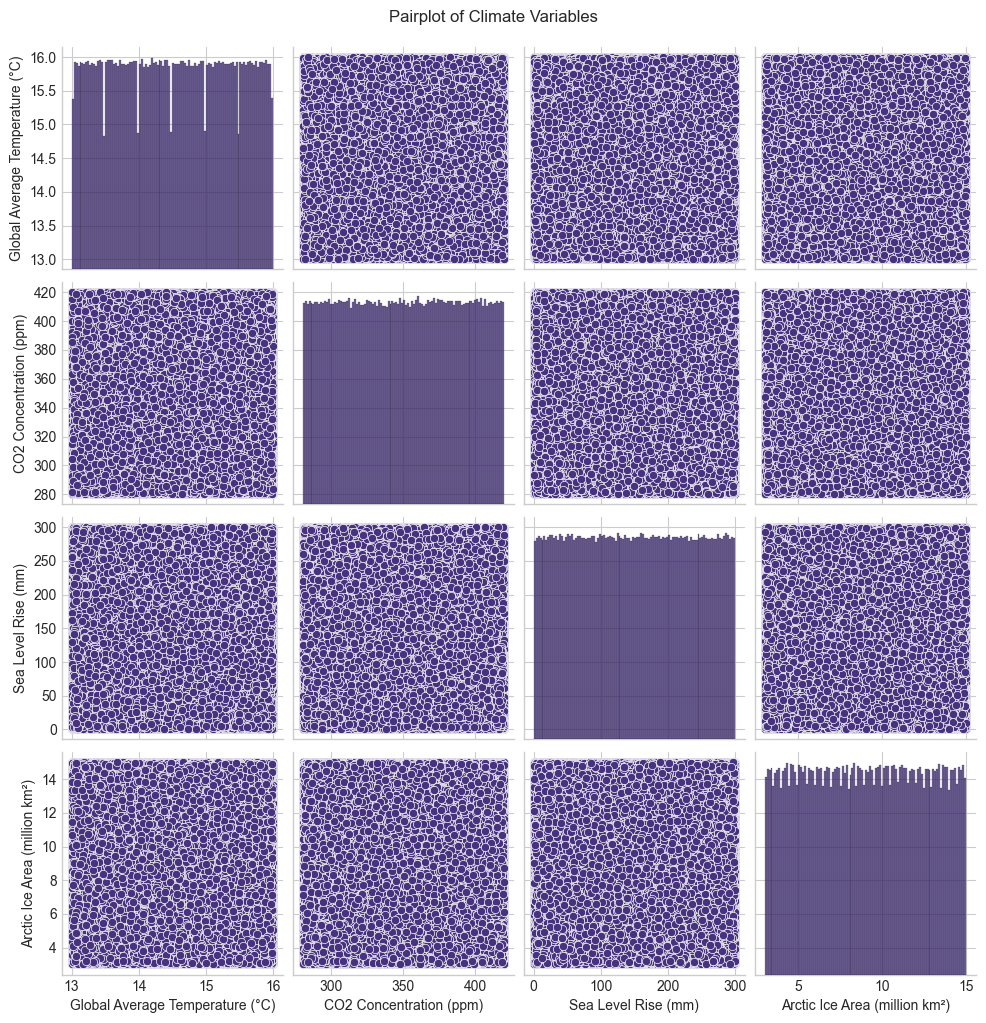

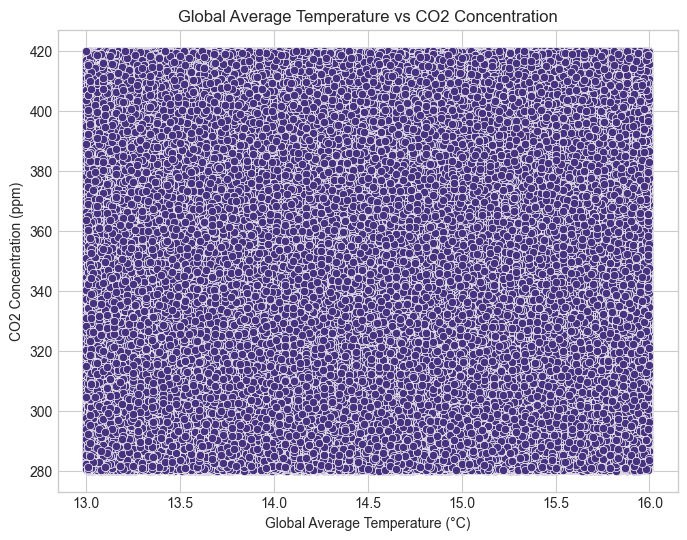

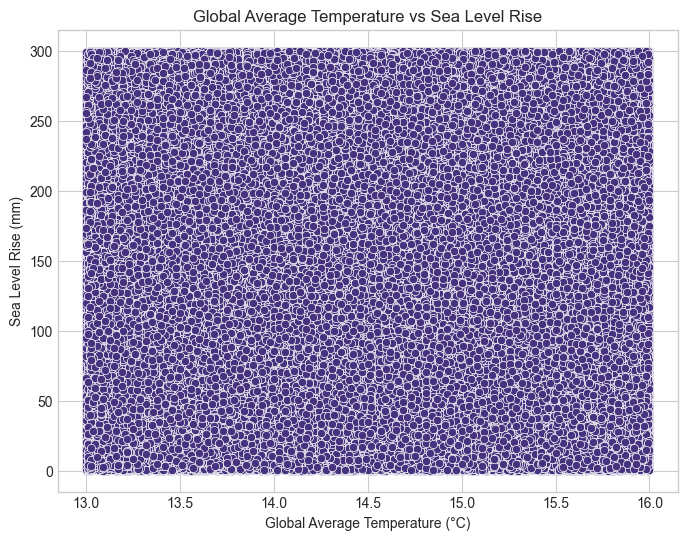

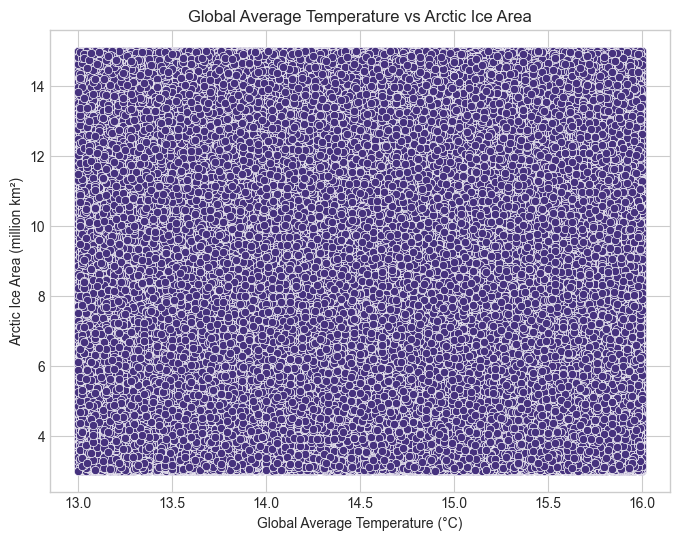

In [11]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

# Calculate the correlation matrix
correlation_matrix = df[climate_vars].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Climate Variables')
plt.show()

# Bivariate analysis: Scatter plots to explore relationships between pairs of variables
# Create a pairplot (scatterplot matrix)
sns.pairplot(df[climate_vars])
plt.suptitle('Pairplot of Climate Variables', y=1.02)
plt.show()

# Scatter plots between specific pairs of variables (for example: Temperature vs CO2)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Global Average Temperature (°C)'], y=df['CO2 Concentration (ppm)'])
plt.title('Global Average Temperature vs CO2 Concentration')
plt.xlabel('Global Average Temperature (°C)')
plt.ylabel('CO2 Concentration (ppm)')
plt.show()

# Additional scatter plots for other relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Global Average Temperature (°C)'], y=df['Sea Level Rise (mm)'])
plt.title('Global Average Temperature vs Sea Level Rise')
plt.xlabel('Global Average Temperature (°C)')
plt.ylabel('Sea Level Rise (mm)')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Global Average Temperature (°C)'], y=df['Arctic Ice Area (million km²)'])
plt.title('Global Average Temperature vs Arctic Ice Area')
plt.xlabel('Global Average Temperature (°C)')
plt.ylabel('Arctic Ice Area (million km²)')
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

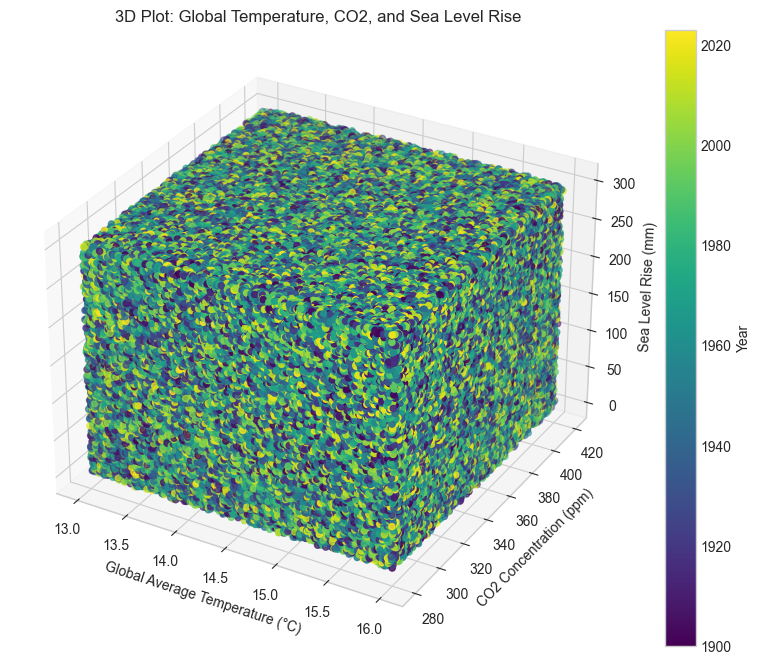

In [12]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here
# Setup the plot
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# Check if df is loaded correctly
# Step 2: Univariate Analysis
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot to explore relationships between 3 variables
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use 'Global Average Temperature (°C)', 'CO2 Concentration (ppm)', and 'Sea Level Rise (mm)'
x = df['Global Average Temperature (°C)']
y = df['CO2 Concentration (ppm)']
z = df['Sea Level Rise (mm)']

# Scatter plot
sc = ax.scatter(x, y, z, c=df['Year'], cmap='viridis', marker='o')

# Labels and title
ax.set_xlabel('Global Average Temperature (°C)')
ax.set_ylabel('CO2 Concentration (ppm)')
ax.set_zlabel('Sea Level Rise (mm)')
ax.set_title('3D Plot: Global Temperature, CO2, and Sea Level Rise')

# Add a color bar to show the years
plt.colorbar(sc, label='Year')

plt.show()

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here
1. Global Temperature & CO2: Both global temperatures and CO2 levels have increased over the past century, with sharp rises after the mid-20th century.
2.Sea Levels: Sea levels are steadily rising, accelerating in recent decades, likely due to melting ice and thermal expansion.
3.Arctic Ice: Arctic ice is decreasing, with a noticeable decline in recent decades, contributing to rising temperatures.
Implications:

Rising temperatures, CO2, and sea levels are major environmental concerns, leading to extreme weather events and loss of biodiversity.
Coastal regions face significant risks from rising sea levels.
Economic impacts include damage to infrastructure and disruptions in agriculture.
Further Investigation:

Investigate regional differences in climate trends.
Look into the impact of specific events (e.g., industrialization) on climate.
Consider predictive models to forecast future climate trends.

# TODO: Write your conclusions here